<a href="https://colab.research.google.com/github/hr1378/ML-Projects/blob/main/05_transfer_learning_in_tensorflow_part_2_fine_tuning_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi


Fri Nov 22 16:57:47 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2024-11-22 16:57:47--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.207, 173.194.203.207, 74.125.199.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   134MB/s    in 1.2s    

2024-11-22 16:57:48 (134 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
import os
import zipfile
zipref= zipfile.ZipFile("/content/10_food_classes_10_percent.zip")
zipref.extractall()
zipref.close()

In [ ]:
train_dir="/content/10_food_classes_10_percent/train"
test_dir="/content/10_food_classes_10_percent/test"


In [ ]:
import tensorflow as tf
img_size=(224,224)
batch_size=32
train10=tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                      image_size=(224,224),
                                                      label_mode="categorical",
                                                      batch_size=32)
test=tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                         image_size=(224,224),
                                                         label_mode="categorical",
                                                         batch_size=32)


Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
train10

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [ ]:
train10.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
base=tf.keras.applications.EfficientNetB0(include_top=False)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
base.trainable+False

1

In [ ]:
import tf_keras
inputs=tf.keras.layers.Input(shape=(224,224,3),
                            name="inp")
x=base(inputs)
x=tf.keras.layers.GlobalAveragePooling2D(name='gvp')(x)
op=tf.keras.layers.Dense(10,activation='softmax')(x)
model0=tf.keras.Model(inputs,op)
model0.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])
history0=model0.fit(train10,
                   epochs=5,
                   steps_per_epoch=len(train10),
                   validation_data=test,
                   validation_steps=len(test),
                   )

Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 152s 3s/step - accuracy: 0.3969 - loss: 1.7548 - val_accuracy: 0.6576 - val_loss: 1.1474
Epoch 2/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 367ms/step - accuracy: 0.9183 - loss: 0.2574 - val_accuracy: 0.7192 - val_loss: 0.9800
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 325ms/step - accuracy: 0.9864 - loss: 0.0863 - val_accuracy: 0.7780 - val_loss: 0.8175


In [ ]:
model0.evaluate(test)

79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.7852 - loss: 0.7969


[0.8175222277641296, 0.777999997138977]

In [ ]:
for layerno,layer in enumerate(base.layers):
  print(layerno,layer.name)

0 input_layer
1 rescaling
2 normalization
3 rescaling_1
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activati

In [ ]:
model0.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inp (InputLayer)                     │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (None, 7, 7, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gvp (GlobalAveragePooling2D)         │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          12,810 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,103,099 (46.17 MB)

 Trainable params: 4,020,358 (15.34 MB)

 Non-trainable params: 42,023 (164.16 KB)

 Optimizer params: 8,040,718 (30.67 MB)

In [ ]:
input_shape=(1,4,4,3)
tf.random.set_seed(42)
input_tensor=tf.random.normal(input_shape)
global_average_pooled_tensor=tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D global average pooled random tensor:\n {global_average_pooled_tensor}\n")

# Check the shape of the different tensors
print(f"Shape of input tensor: {input_tensor.shape}")
print(f"Shape of Global Average Pooled 2D tensor: {global_average_pooled_tensor.shape}")

2D global average pooled random tensor:
 [[-0.09368646 -0.45840448 -0.2885598 ]]

Shape of input tensor: (1, 4, 4, 3)
Shape of Global Average Pooled 2D tensor: (1, 3)


In [ ]:
tf.reduce_mean(input_tensor,axis=1)


<tf.Tensor: shape=(1, 4, 3), dtype=float32, numpy=
array([[[ 0.02287039, -0.7079675 , -0.18445629],
        [-0.22584781, -1.0625229 , -1.0637602 ],
        [ 0.19519491,  0.27462944,  0.20018604],
        [-0.36696342, -0.3377568 , -0.10620877]]], dtype=float32)>

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

--2024-11-22 17:01:04--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.199.207, 74.125.20.207, 108.177.98.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.199.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   124MB/s    in 1.0s    

2024-11-22 17:01:05 (124 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [ ]:
import zipfile

In [ ]:
zipref=zipfile.ZipFile("/content/10_food_classes_1_percent.zip")
zipref.extractall()
zipref.close()

In [ ]:
train_dir_1_percent = "10_food_classes_1_percent/train"
test_dir = "10_food_classes_1_percent/test"
train1p=tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                            label_mode="categorical",
                                                            image_size=(224,224),
                                                            batch_size=32)

test=tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                        label_mode='categorical',
                                                        image_size=(224,224),
                                                        batch_size=32)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import RandomFlip,RandomHeight,RandomRotation,RandomZoom,RandomWidth,Resizing

In [ ]:
data_augmentation=keras.Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.2),
    RandomZoom(0.2),
    RandomHeight(0.2),
    RandomWidth(0.2),
    Resizing(224,224)])

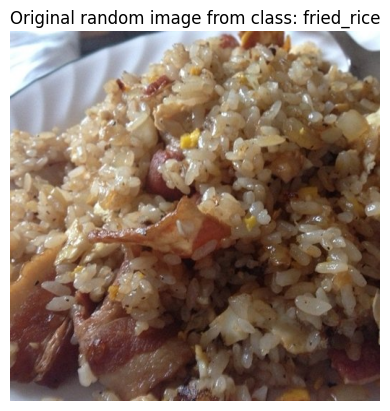

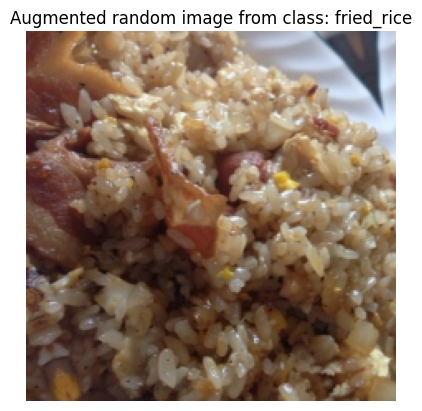

In [ ]:
# View a random image and compare it to its augmented version
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train1p.class_names)
target_dir = "10_food_classes_1_percent/train/" + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image

# Read and plot in the random image
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"Original random image from class: {target_class}")
plt.axis(False);

# Now let's plot our augmented random image
augmented_img = data_augmentation(tf.expand_dims(img, axis=0))
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.)
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False);
# print(augmented_img)

In [ ]:
input_shape=(224,224,3)
batch_size=32


In [ ]:
input_shape = (224, 224, 3)
data_augmentation=keras.Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.2),
    RandomZoom(0.2),
    RandomHeight(0.2),
    RandomWidth(0.2),
    Resizing(224,224)])
base0=tf.keras.applications.EfficientNetB0(include_top=False)
base0.trainable=False
inputs=layers.Input(shape=input_shape,name='inp')
x=data_augmentation(inputs)
x=base0(x,training=False)
x=layers.GlobalAveragePooling2D(name='gap')(x)
outputs=layers.Dense(10,activation="softmax")(x)
model2=keras.Model(inputs,outputs)
model2.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])
history2=model2.fit(train1p,
                    epochs=5,
                    steps_per_epoch=len(train1p),
                    validation_data=test,
                    validation_steps=int(0.25*len(test)))

Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.1001 - loss: 2.3686 - val_accuracy: 0.1497 - val_loss: 2.2450
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 647ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.1908 - val_loss: 2.2007
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 678ms/step - accuracy: 0.1417 - loss: 2.1806 - val_accuracy: 0.1990 - val_loss: 2.1178
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 417ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.2237 - val_loss: 2.1074
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 592ms/step - accuracy: 0.3589 - loss: 1.9782 - val_accuracy: 0.2794 - val_loss: 2.0561


In [ ]:
model2.evaluate(test)

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - accuracy: 0.2715 - loss: 2.0406


[2.038003921508789, 0.274399995803833]

In [ ]:
train_dir="10_food_classes_10_percent/train"
test_dir="10_food_classes_10_percent/test"

In [ ]:
import tensorflow as tf
img_size=(224,224)
train10=tf.keras .preprocessing.image_dataset_from_directory(train_dir,
                                                             label_mode="categorical",
                                                             image_size=(224,224))
test=tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                         label_mode="categorical",
                                                         image_size=(224,224))

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
data_auggmentation=keras.Sequential([
    RandomFlip("horizontal"),
    RandomHeight(0.2),
    RandomWidth(0.2),
    RandomZoom(0.2),
    RandomRotation(0.2)
])

base1=tf.keras.applications.EfficientNetB0(include_top=False)
base1.trainable=False

In [ ]:
imputs=layers.Input(shape=input_shape)
x=data_augmentation(inputs)
x=base1(x,training=False)
x=layers.GlobalAveragePooling2D()(x)
op=layers.Dense(10,activation="sigmoid")(x)
model2=tf.keras.Model(inputs,op)


model2.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])



In [ ]:
checkpoint_path="ten_percent_model_checkpoints_weights/checkpoint.ckpt.weights.h5" # Changed the file extension to .weights.h5
checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                        save_weights_only=True,
                                                        save_best_only=True,
                                                        save_freq="epoch",
                                                        verbose=1)

In [ ]:
initial_epochs=5
history=model2.fit(train10,
                   epochs=initial_epochs,
                   validation_data=test,
                   validation_steps=len(test),
                   )

Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 20s 415ms/step - accuracy: 0.1584 - loss: 2.2766 - val_accuracy: 0.5656 - val_loss: 1.6105
Epoch 2/5
23/24 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.5586 - loss: 1.5988

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 186ms/step - accuracy: 0.5607 - loss: 1.5936
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 366ms/step - accuracy: 0.6591 - loss: 1.2846 - val_accuracy: 0.7444 - val_loss: 0.9852
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 0.7010 - loss: 1.0927
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 319ms/step - accuracy: 0.7381 - loss: 0.9947 - val_accuracy: 0.7804 - val_loss: 0.7946


In [ ]:
model2.evaluate(test)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - accuracy: 0.7819 - loss: 0.7936


[0.7945802807807922, 0.7803999781608582]

In [ ]:
model2.layers

[<InputLayer name=input_layer, built=True>,
 <Sequential name=sequential_1, built=True>,
 <Functional name=efficientnetb0, built=True>,
 <GlobalAveragePooling2D name=global_average_pooling2d_7, built=True>,
 <Dense name=dense_8, built=True>]

In [ ]:
for layer in model2.layers:
  print(layer,layer.trainable)

<InputLayer name=input_layer, built=True> True
<Sequential name=sequential_1, built=True> True
<Functional name=efficientnetb0, built=True> False
<GlobalAveragePooling2D name=global_average_pooling2d_7, built=True> True
<Dense name=dense_8, built=True> True


In [ ]:
for i , layer in enumerate(model2.layers[2].layers):
  print(i,layer.name,layer.trainable)

0 input_layer_4 False
1 rescaling_4 False
2 normalization_2 False
3 rescaling_5 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeez

In [ ]:
print(len(model2.layers[2].trainable_variables))

0


In [ ]:
base1.trainable=True

In [ ]:
for layer in base1.layers[:-10]:
  layer.trainable=False

model2.compile(loss="categorical_crossentropty",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

In [ ]:
for i,layer in enumerate(model2.layers[2].layers):
  print(i , layer.trainable)

0 False
1 False
2 False
3 False
4 False
5 False
6 False
7 False
8 False
9 False
10 False
11 False
12 False
13 False
14 False
15 False
16 False
17 False
18 False
19 False
20 False
21 False
22 False
23 False
24 False
25 False
26 False
27 False
28 False
29 False
30 False
31 False
32 False
33 False
34 False
35 False
36 False
37 False
38 False
39 False
40 False
41 False
42 False
43 False
44 False
45 False
46 False
47 False
48 False
49 False
50 False
51 False
52 False
53 False
54 False
55 False
56 False
57 False
58 False
59 False
60 False
61 False
62 False
63 False
64 False
65 False
66 False
67 False
68 False
69 False
70 False
71 False
72 False
73 False
74 False
75 False
76 False
77 False
78 False
79 False
80 False
81 False
82 False
83 False
84 False
85 False
86 False
87 False
88 False
89 False
90 False
91 False
92 False
93 False
94 False
95 False
96 False
97 False
98 False
99 False
100 False
101 False
102 False
103 False
104 False
105 False
106 False
107 False
108 False
109 False
110 False


In [ ]:
print(len(model2.layers[2].trainable_variables))

10


In [ ]:
print(len(model2.trainable_variables))

12
